In [1]:
%matplotlib inline
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt


def read_sqlite(file):
    conn = sqlite3.connect(file)
    try:
        df = pd.read_sql_query('SELECT * FROM result', conn)
    except:
        return None
    finally:
        conn.close()
    return df

In [2]:
vals = [0.1, 0.178, 0.31, 0.562, 1, 1.778, 3.162, 5.623, 10, 17.783, 31.622, 56.234, 100]
dfs = dict(map(lambda x: (x, read_sqlite('results/monetdb_tpch1_flip_x_y_{0:g}_results.sqlite'.format(x))), vals))
# dfs

In [3]:
for val in vals:
    dfs[val]['rate'] = val

In [4]:
merged_df = pd.concat(list(dfs.values()))
merged_df = merged_df.drop(['stdout', 'stderr'], axis=1)
# merged_df

In [5]:
df = merged_df.groupby(['result', 'rate']).size().reset_index(name='counts')
df = df[df['result'] != -1]

for result in range(5):
    for rate in vals:
        if len(df[(df['result'] == result) & (df['rate'] == rate)]) == 0:
            df = df.append({
                'result': result,
                'rate': rate,
                'counts': 0
            }, ignore_index=True)

df['result'] = df['result'].astype(int)
df['counts'] = df['counts'].astype(int)
df.sort_values(['result', 'rate'], inplace=True)
# df

In [6]:
pivoted = pd.pivot_table(df, values='counts', index='rate', columns='result')
pivoted.columns = ['ok', 'incorrect', 'crash', 'abnormal', 'timeout']
pivoted

,ok,incorrect,crash,abnormal,timeout
rate,,,,,
0.100,97496,0,4,0,0
0.178,97495,0,4,0,0
0.310,97488,0,11,0,0
0.562,97469,0,28,0,0
1.000,97442,0,54,0,0
1.778,97416,3,71,0,1
3.162,97314,3,159,0,1
5.623,97216,3,242,0,2
10.000,96977,5,446,0,2


In [7]:
pivoted / 97500

,ok,incorrect,crash,abnormal,timeout
rate,,,,,
0.100,0.999959,0.000000,0.000041,0.0,0.000000
0.178,0.999949,0.000000,0.000041,0.0,0.000000
0.310,0.999877,0.000000,0.000113,0.0,0.000000
0.562,0.999682,0.000000,0.000287,0.0,0.000000
1.000,0.999405,0.000000,0.000554,0.0,0.000000
1.778,0.999138,0.000031,0.000728,0.0,0.000010
3.162,0.998092,0.000031,0.001631,0.0,0.000010
5.623,0.997087,0.000031,0.002482,0.0,0.000021
10.000,0.994636,0.000051,0.004574,0.0,0.000021


In [8]:
print(pivoted.to_latex())

\begin{tabular}{lrrrrr}
\toprule
{} &     ok &  incorrect &  crash &  abnormal &  timeout \\
rate    &        &            &        &           &          \\
\midrule
0.100   &  97496 &          0 &      4 &         0 &        0 \\
0.178   &  97495 &          0 &      4 &         0 &        0 \\
0.310   &  97488 &          0 &     11 &         0 &        0 \\
0.562   &  97469 &          0 &     28 &         0 &        0 \\
1.000   &  97442 &          0 &     54 &         0 &        0 \\
1.778   &  97416 &          3 &     71 &         0 &        1 \\
3.162   &  97314 &          3 &    159 &         0 &        1 \\
5.623   &  97216 &          3 &    242 &         0 &        2 \\
10.000  &  96977 &          5 &    446 &         0 &        2 \\
17.783  &  96628 &         10 &    744 &         0 &        5 \\
31.622  &  95828 &         23 &   1455 &         0 &        5 \\
56.234  &  94611 &         47 &   2489 &         0 &       10 \\
100.000 &  92536 &         85 &   4287 &         0 & 

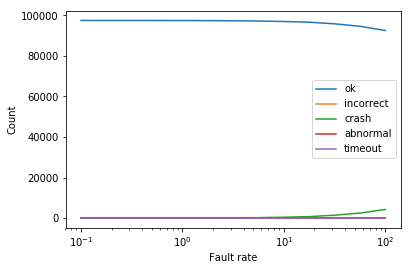

In [10]:
fig = plt.figure()
plt.ylabel('Count')
plt.xlabel('Fault rate')
plt.xscale('log')
plt.plot(vals, pivoted['ok'], label='ok')
plt.plot(vals, pivoted['incorrect'], label='incorrect')
plt.plot(vals, pivoted['crash'], label='crash')
plt.plot(vals, pivoted['abnormal'], label='abnormal')
plt.plot(vals, pivoted['timeout'], label='timeout')
plt.legend()
plt.show()

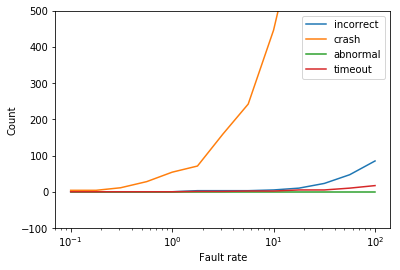

In [14]:
fig = plt.figure()
plt.ylabel('Count')
plt.xlabel('Fault rate')
plt.xscale('log')
plt.plot(vals, pivoted['incorrect'], label='incorrect')
plt.plot(vals, pivoted['crash'], label='crash')
plt.plot(vals, pivoted['abnormal'], label='abnormal')
plt.plot(vals, pivoted['timeout'], label='timeout')
plt.ylim((-100, 500))
plt.legend()
plt.show()

<IPython.core.display.Javascript object>


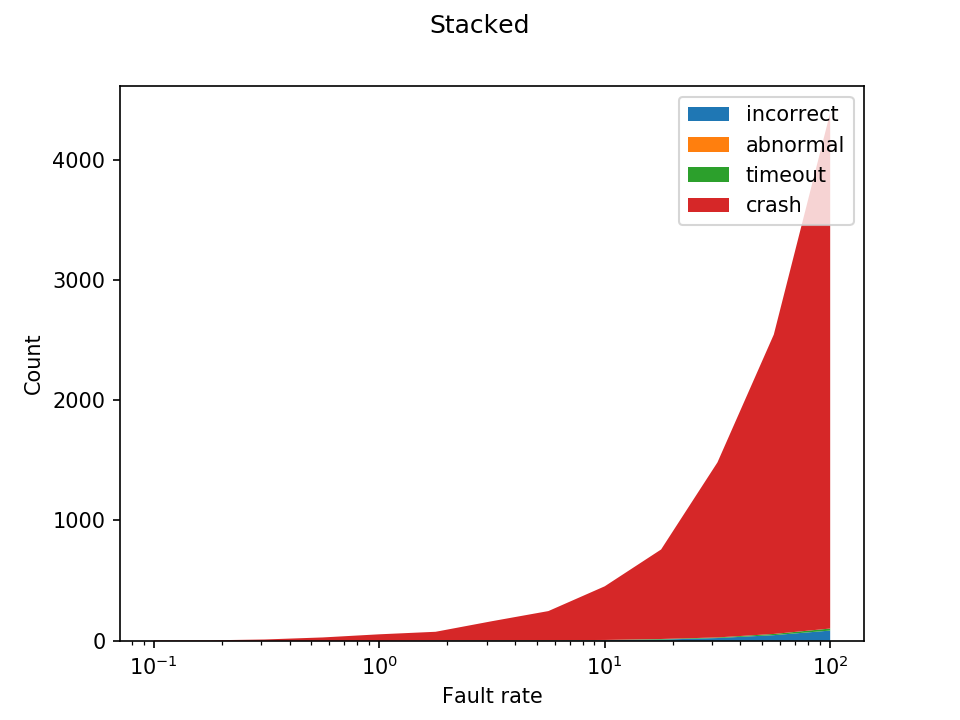

In [15]:
fig = plt.figure()

fig.suptitle('Stacked')
plt.ylabel('Count')
plt.xlabel('Fault rate')
plt.xscale('log')
plt.stackplot(vals,
              pivoted['incorrect'],
              pivoted['abnormal'],
              pivoted['timeout'],
              pivoted['crash'],
              baseline='zero',
              labels=['incorrect', 'abnormal', 'timeout', 'crash'])
plt.legend()
plt.show()

<IPython.core.display.Javascript object>


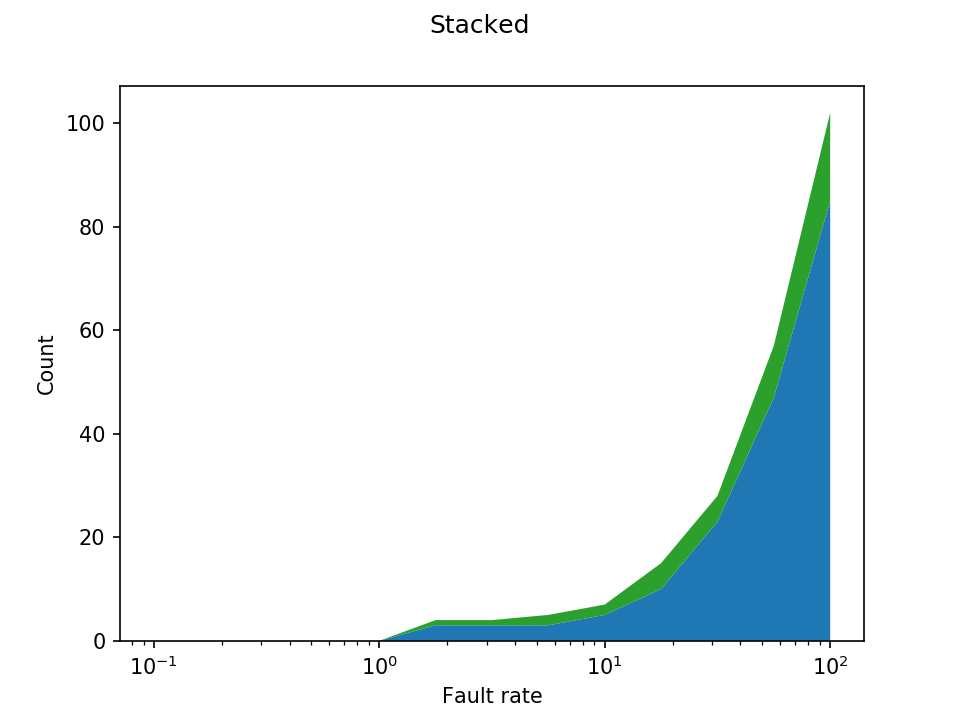

In [16]:
fig = plt.figure()

fig.suptitle('Stacked')
plt.ylabel('Count')
plt.xlabel('Fault rate')
plt.xscale('log')
plt.stackplot(vals,
              pivoted['incorrect'],
              pivoted['abnormal'],
              pivoted['timeout'],
              baseline='zero',
              labels=['incorrect', 'abnormal', 'timeout'])
plt.show()

<IPython.core.display.Javascript object>


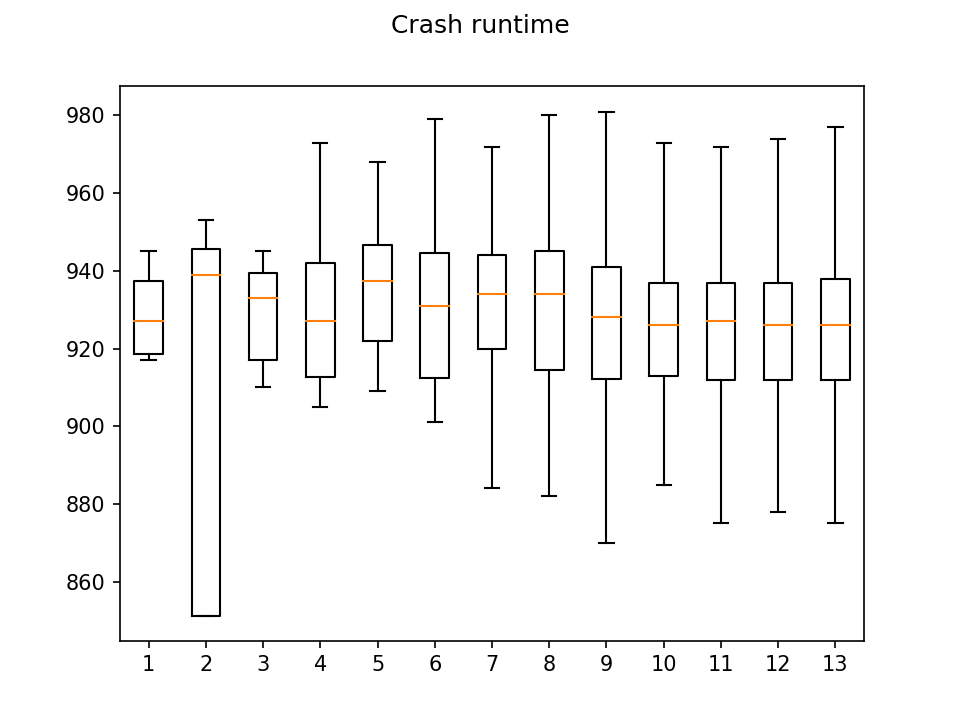

In [17]:
fig = plt.figure()

fig.suptitle('Crash runtime')

df_2 = merged_df[merged_df['result'] == 2]
data_2 = list(map(lambda x: list(df_2[df_2['rate'] == x]['runtime']), vals))

plt.boxplot(data_2, showfliers=False)
plt.show()

<IPython.core.display.Javascript object>


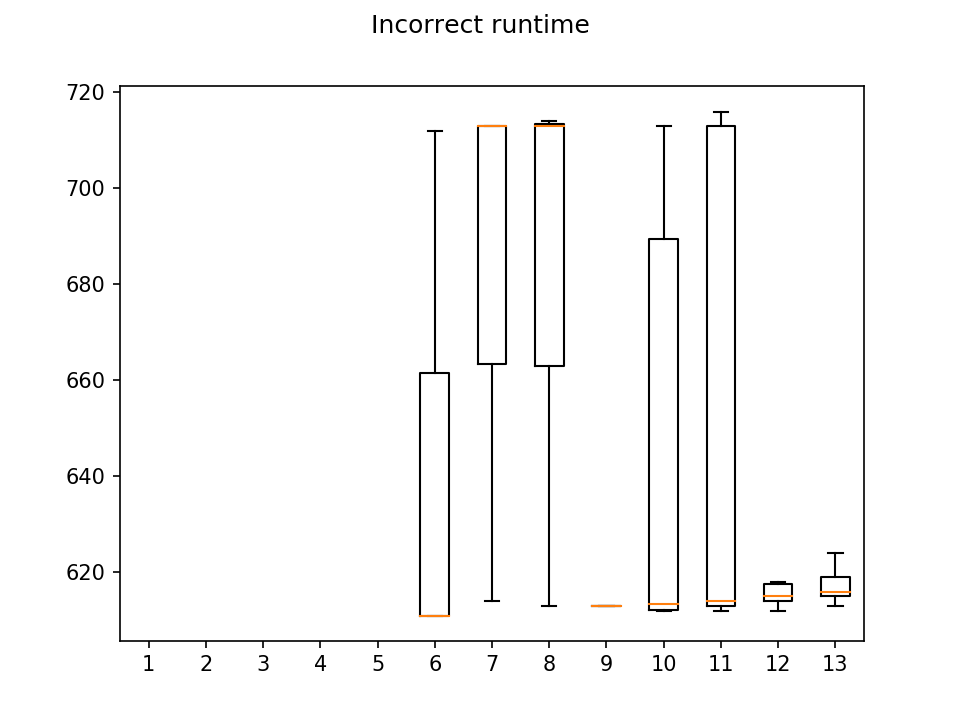

In [18]:
fig = plt.figure()

fig.suptitle('Incorrect runtime')

df_2 = merged_df[merged_df['result'] == 1]
data_2 = list(map(lambda x: list(df_2[df_2['rate'] == x]['runtime']), vals))

plt.boxplot(data_2, showfliers=False)
plt.show()

<IPython.core.display.Javascript object>


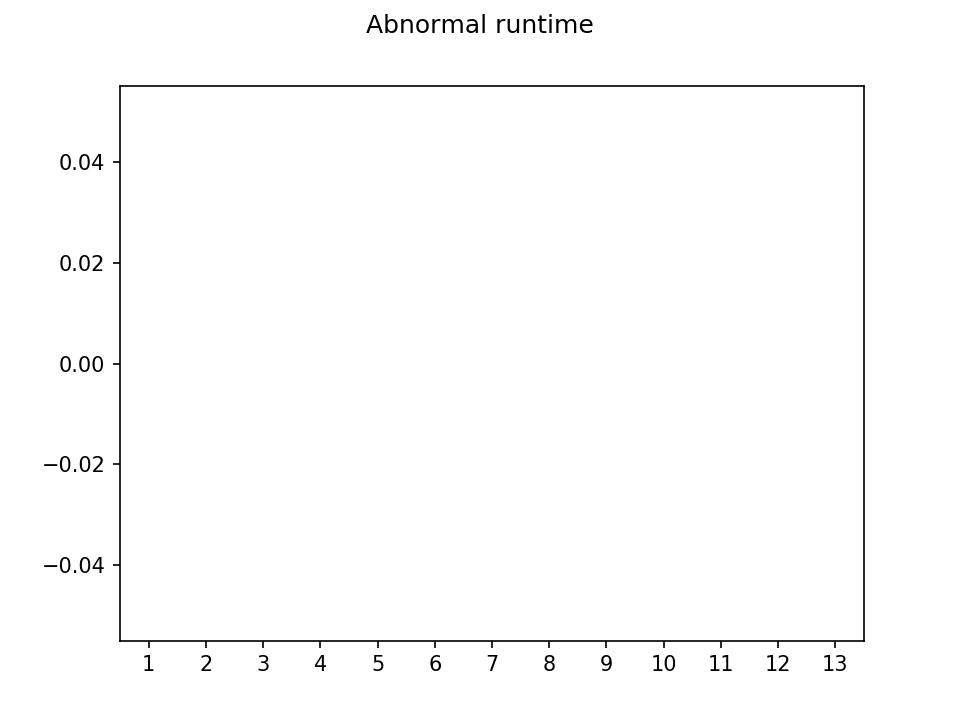

In [19]:
fig = plt.figure()

fig.suptitle('Abnormal runtime')

df_2 = merged_df[merged_df['result'] == 3]
data_2 = list(map(lambda x: list(df_2[df_2['rate'] == x]['runtime']), vals))

plt.boxplot(data_2, showfliers=False)
plt.show()

<IPython.core.display.Javascript object>


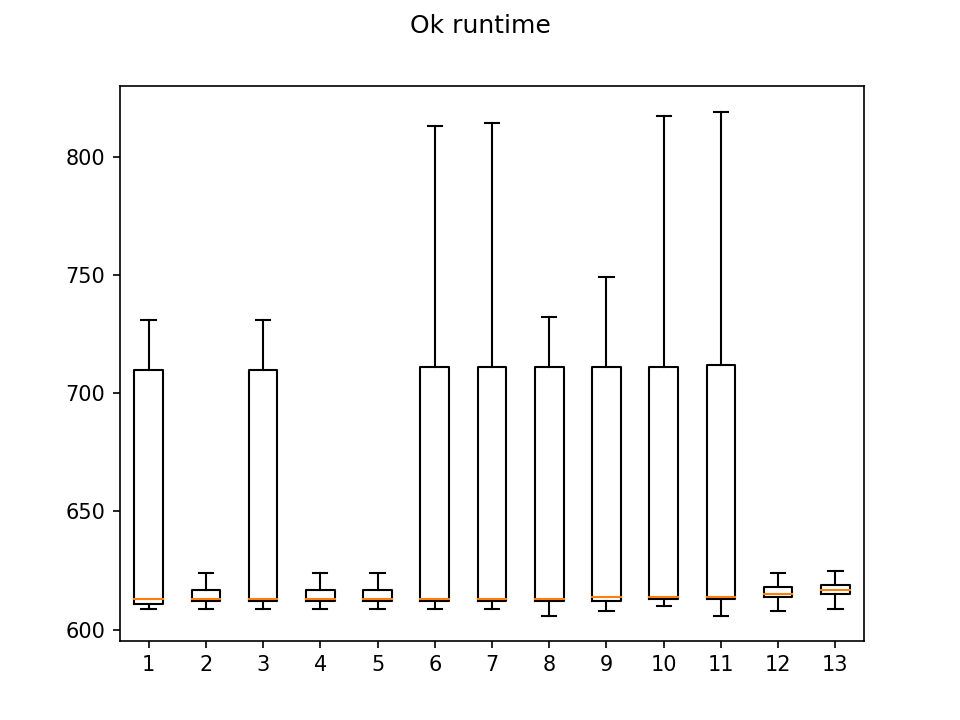

In [20]:
fig = plt.figure()

fig.suptitle('Ok runtime')

df_2 = merged_df[merged_df['result'] == 0]
data_2 = list(map(lambda x: list(df_2[df_2['rate'] == x]['runtime']), vals))

plt.boxplot(data_2, showfliers=False)
plt.show()

In [21]:
crashes = merged_df[merged_df['result'] == 2]
signals = crashes['term_sig'].unique()
crash_count = crashes.groupby(['term_sig', 'rate']).size().reset_index(name='counts')
crash_pivoted = pd.pivot_table(crash_count, values='counts', index='rate', columns='term_sig', fill_value=0)
crash_pivoted

term_sig,4,6,7,11
rate,,,,
0.100,0,0,0,4
0.178,0,0,0,4
0.310,0,0,2,9
0.562,0,0,3,25
1.000,0,0,4,50
1.778,0,0,2,69
3.162,0,1,14,144
5.623,0,1,23,218
10.000,0,3,35,408


<IPython.core.display.Javascript object>


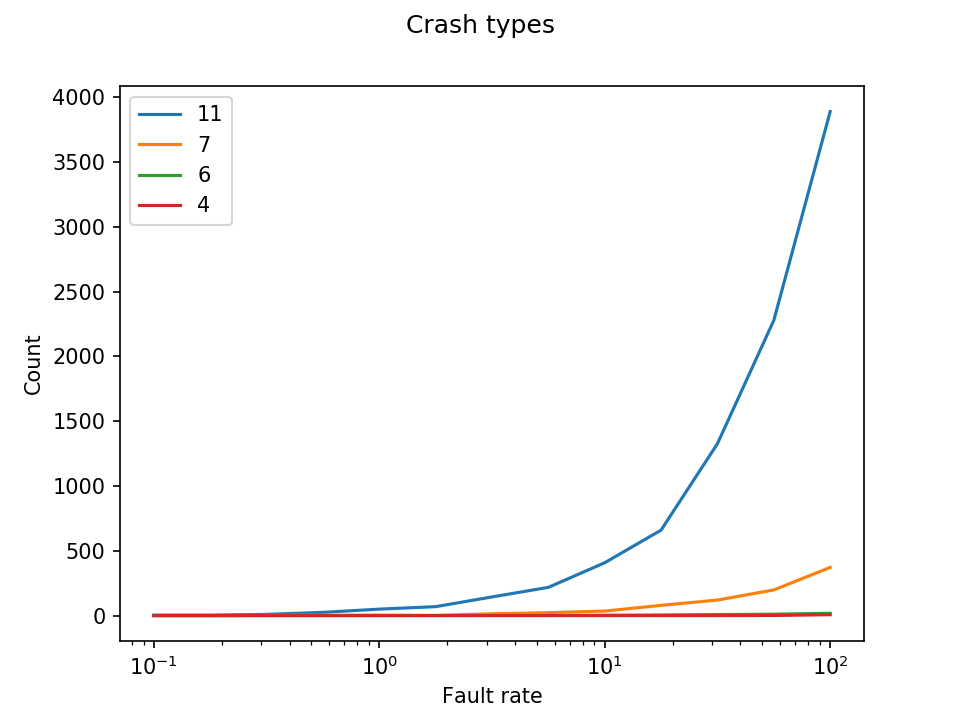

In [22]:
fig = plt.figure()
fig.suptitle('Crash types')
plt.ylabel('Count')
plt.xlabel('Fault rate')
plt.xscale('log')

for signal in signals:
    plt.plot(vals, crash_pivoted[signal], label=str(signal))
    
plt.legend()
plt.show()